## Predicting optimum number of clusters using scikit-learn

Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
del iris["Id"]
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
# Changing column names of dataset

iris.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Visualizing pairwise plot of dataset

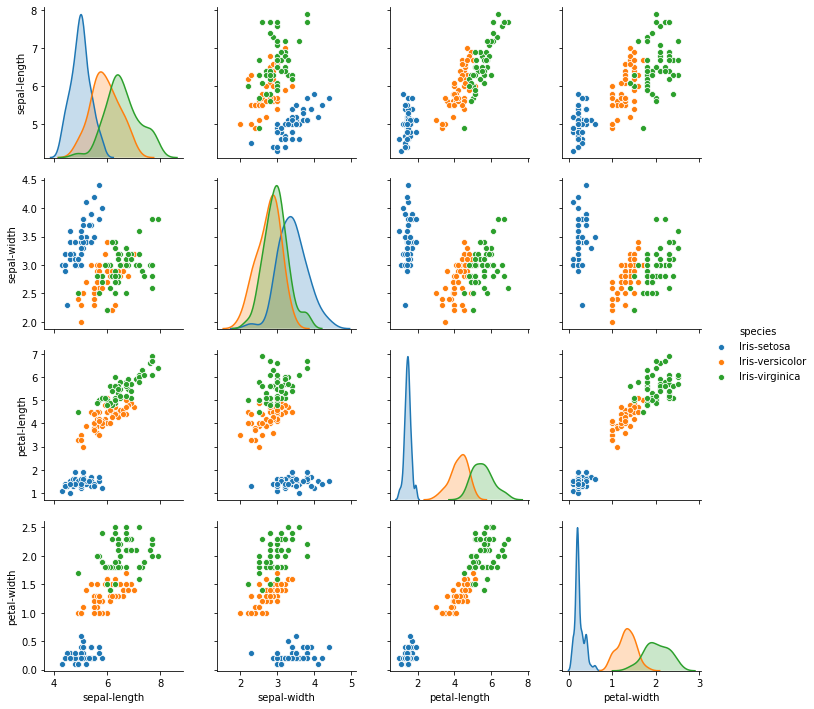

In [8]:
sns.pairplot(iris, hue="species")

In [9]:
# Replace categroical values in column 'Species' with numbers

iris.replace(to_replace=['Iris-setosa','Iris-versicolor','Iris-virginica'], value=[1,2,3], inplace=True)

In [10]:
iris.head(10)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


#### Visualize data using heatmap

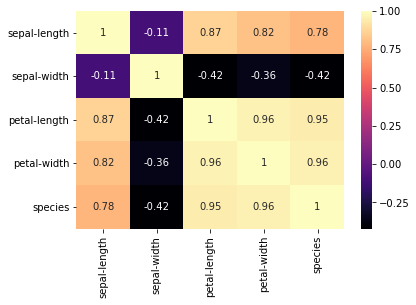

In [11]:
sns.heatmap(iris.corr(),annot=True,cmap="magma")

In [12]:
X = iris[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].values

y = iris['species'].values

In [13]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27,random_state=42)

In [15]:
# initialize scaling model

scaler = StandardScaler()

In [16]:
# fit the scaling model using training data

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
# Feature Scaling

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# KNN model

knn_model = KNeighborsClassifier(n_neighbors=3)

In [19]:
# fit the model training data and target values

knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
# Predicting the class labels

y_pred = knn_model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
# displaying confusion matrix and classification report

print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[17  0  0]
 [ 0 11  0]
 [ 0  0 13]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [23]:
# Determining optimal no. of cluster using ELBOW METHOD
# Taking K-value range between 1 and 50

error = list()

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

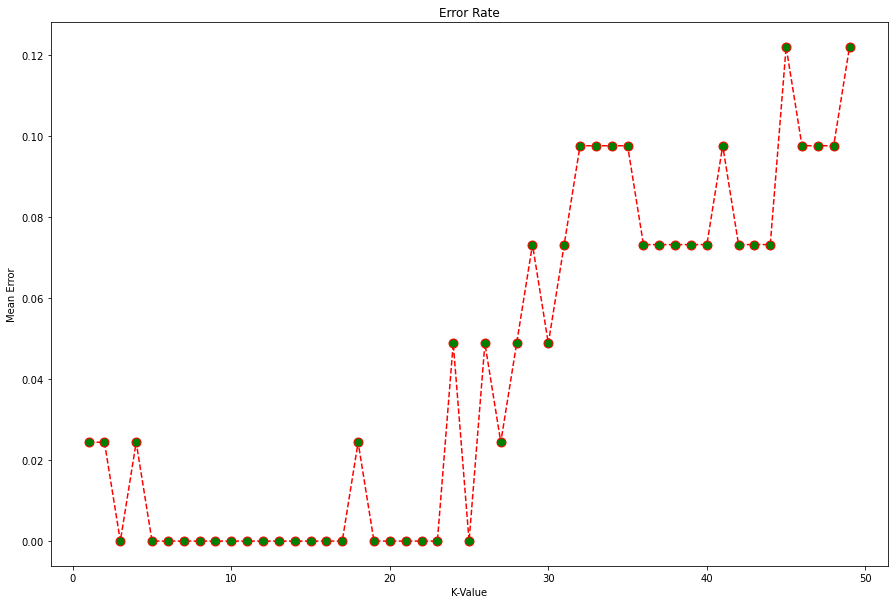

In [24]:
# Visualizing error graph
# Plotting the graph of K-value and the corresponding error rate for the dataset

plt.figure(figsize=(15, 10))
plt.plot(range(1, 50), error, color='red', linestyle='--', marker='o',markerfacecolor='green', markersize=9)
plt.title('Error Rate')
plt.xlabel('K-Value')
plt.ylabel('Mean Error')

From the above graph, we can infer that the mean error is zero when there are optimal values of K as follows :
#### K = [5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,25]